In [2]:
%reset_selective -f [model]
import torch 
import math
from torch import nn
from tqdm.notebook import trange, tqdm
from torch import sigmoid
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

torch.set_default_tensor_type(torch.DoubleTensor)

class ELM(nn.Module):
    def __init__(self, input_size, neurons, output_size):
        super().__init__()        
        self.input_size = input_size
        self.input = nn.Linear(input_size,neurons,dtype=torch.double)        
        self.output = nn.Linear(neurons,output_size,dtype=torch.double, bias=False)
    
    
    def train(self, data, labels):
        self.data = data.reshape(data.size(0),1)
        self.labels= labels.reshape(labels.size(0),1)   
        fd=self.input(self.data)        
        self.H = sigmoid(fd)        
        self.Hp = torch.linalg.pinv(self.H)        
        self.output.weight.data = torch.t(torch.matmul(self.Hp, self.labels))
        
    def forward(self, X):          
        return(self.output(sigmoid(self.input(X.reshape(X.size(0),1)))))
    
    def loss(self, X, y):        
        f = nn.MSELoss()
        return(f( self.forward(X.reshape(X.size(0),1)), y.reshape(y.size(0),1)) )
    
    def sequential_learning(self,x,y):
        a = sigmoid(self.input(x.reshape(x.size(0),1)))
        A = self.H
        Anew = torch.vstack((A,a))
        Hnew = torch.linalg.pinv(Anew)
        ynew = torch.vstack((self.labels,y.reshape(y.size(0),1)))
        newweights = torch.t(torch.matmul(Hnew,ynew))
        self.output.weight.data = newweights
        

def testit( MODEL, f,N=100, test_size=0.2, learnrate=0.2, shuffle=True, printing=True):
    x = torch.arange(N)*(1/N)    
    y = f(x)
    x.reshape((N,1))
    y.reshape((N,1))
    xtr, xtest, ytr, ytest = train_test_split(x, y, test_size=test_size,shuffle=True)
    
    initN=int(N*learnrate*(1-test_size))
    testN=int(N*(1-learnrate)*(1-test_size))

    xtr_init = xtr[:initN]
    ytr_init = ytr[:initN]
    
    MODEL.train(xtr_init,ytr_init)        
    
    if(printing):
        print("Prediction")
        prediction =  MODEL.forward(x)
        figure,axis=plt.subplots(1,1)
        figure.set_figwidth(10)
        figure.set_figheight(5)
        A =  MODEL.loss(xtest,ytest)
        plt.title("MSE der Testdaten vor dem Lernen:"+str(A))
        axis.plot(x.numpy(), y.numpy(),color="blue")
        axis.plot(x.numpy(), prediction.detach().numpy(),color="red")       
        plt.show()
    
    MSELoss=[]            
    for i in trange(initN+testN, desc="learning"):            
    #for i in range(testN):            
        xx=torch.tensor([xtr[i]])
        yy=torch.tensor([ytr[i]])
        MODEL.sequential_learning(xx,yy)
        MSELoss.append( MODEL.loss(xtest,ytest).detach().numpy())  
    
    if(printing):
        print("Prediction")
        prediction =  MODEL.forward(x)
        figure,axis=plt.subplots(1,1)
        figure.set_figwidth(10)
        figure.set_figheight(5)    
        axis.plot(x.numpy(), y.numpy(), color="blue")
        axis.plot(x.numpy(), prediction.detach().numpy(), color="red")
        B =  MODEL.loss(xtest,ytest)
        plt.title("MSE der Testdaten vor dem Lernen:"+str(B))        
        plt.show()
        print("Loss-Function")
        xaxis=np.linspace(0,len(MSELoss)-1,len(MSELoss))    
        plt.plot(xaxis,np.array(MSELoss))
        plt.show()        
    print("MSE nach dem Lernen:", B)     


Prediction


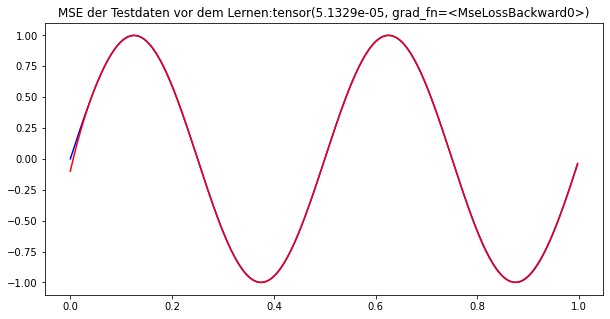

learning:   0%|          | 0/240 [00:00<?, ?it/s]

Prediction


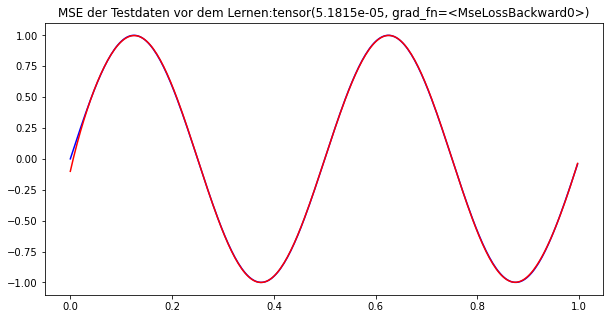

Loss-Function


NameError: name 'np' is not defined

In [3]:
testit(ELM(1,250,1), lambda x: torch.sin(4*torch.pi*x), N=300, test_size=0.2, learnrate=0.2)

In [241]:
model.forward(xtrinit.reshape((16,1)))

tensor([[0.2504],
        [0.2554],
        [0.2568],
        [0.2540],
        [0.2502],
        [0.2567],
        [0.2531],
        [0.2557],
        [0.2555],
        [0.2559],
        [0.2550],
        [0.2559],
        [0.2491],
        [0.2522],
        [0.2537],
        [0.2548]], grad_fn=<MmBackward0>)

In [222]:
xtrinit.resize(xtrinit.size(0),1)

tensor([[0.1900],
        [0.6900],
        [0.9700],
        [0.5100],
        [0.1700],
        [0.9400],
        [0.4200],
        [0.7400],
        [0.7000],
        [0.7700],
        [0.6300],
        [0.7600],
        [0.0900],
        [0.3400],
        [0.4800],
        [0.6100]])

In [212]:
modelo.input.weight.data=torch.tensor([[1.0]])

NameError: name 'modelo' is not defined

In [173]:
a=torch.tensor([[1.0]])

In [177]:
sigmoid(modelo.input(a))

tensor([[0.3082]], grad_fn=<SigmoidBackward0>)

In [178]:
modelo.output.weight.data=torch.tensor([[1.0/0.3082]])

In [179]:
modelo.forward(a)

tensor([[1.0001]], grad_fn=<MmBackward0>)